In [181]:
import pandas as pd
import numpy as np
import json

veja que o simples formato read_json não funciona muito bem em separar os dados neste caso:


In [182]:
dfhistorico = pd.read_json('C:/Users/jvict/OneDrive/Documentos/python\litrometro/api/historico.json')
dfhistorico

,gasolina,diesel,etanol,gasolina aditivada,gnv
0,"{'preco_medio': {'2018-12': 4.58, '2019-01': 4...",NaN,NaN,NaN,NaN
1,NaN,"{'preco_medio': {'2018-12': 3.7, '2019-01': 3....",NaN,NaN,NaN
2,NaN,NaN,"{'preco_medio': {'2018-12': 3.19, '2019-01': 3...",NaN,NaN
3,NaN,NaN,NaN,"{'preco_medio': {'2019-01': 4.3, '2019-02': 4....",NaN
4,NaN,NaN,NaN,NaN,"{'preco_medio': {'2019-01': 3.19, '2019-02': 3..."


Então tentaremos outro approach 

In [183]:
with open('C:/Users/jvict/OneDrive/Documentos/python\litrometro/api/historico.json') as file:
    data = json.load(file)
print(data)

[{'gasolina': {'preco_medio': {'2018-12': 4.58, '2019-01': 4.19, '2019-02': 4.27, '2019-03': 4.29, '2019-04': 4.57, '2019-05': 4.55, '2019-06': 4.4, '2019-07': 4.3, '2019-08': 4.2, '2019-09': 4.39, '2019-10': 4.39, '2019-11': 4.39, '2019-12': 4.47, '2020-01': 4.49, '2020-02': 4.49, '2020-03': 4.47, '2020-04': 4.0, '2020-05': 3.78, '2020-06': 3.9, '2020-07': 4.35, '2020-08': 4.44, '2020-09': 4.45, '2020-10': 4.47, '2020-11': 4.49, '2020-12': 4.6, '2021-01': 4.78, '2021-02': 5.1, '2021-03': 5.6, '2021-04': 5.6, '2021-05': 5.6, '2021-06': 5.8, '2021-07': 5.9, '2021-08': 6.0, '2021-09': 6.09, '2021-10': 6.24, '2021-11': 6.5, '2021-12': 6.5, '2022-01': 6.4, '2022-02': 6.4, '2022-03': 6.99, '2022-04': 7.0, '2022-05': 6.99, '2022-06': 7.19, '2022-07': 5.98, '2022-08': 5.35, '2022-09': 4.98, '2022-10': 4.89, '2022-11': 4.97, '2022-12': 4.87, '2023-01': 4.89, '2023-02': 4.99, '2023-03': 5.43, '2023-04': 5.63, '2023-05': 5.57, '2023-06': 5.39}}}, {'diesel': {'preco_medio': {'2018-12': 3.7, '2019

Podemos ver que aqui temos uma lista de listas e temos que separar em Dataframes separados

In [184]:
data

[{'gasolina': {'preco_medio': {'2018-12': 4.58,
    '2019-01': 4.19,
    '2019-02': 4.27,
    '2019-03': 4.29,
    '2019-04': 4.57,
    '2019-05': 4.55,
    '2019-06': 4.4,
    '2019-07': 4.3,
    '2019-08': 4.2,
    '2019-09': 4.39,
    '2019-10': 4.39,
    '2019-11': 4.39,
    '2019-12': 4.47,
    '2020-01': 4.49,
    '2020-02': 4.49,
    '2020-03': 4.47,
    '2020-04': 4.0,
    '2020-05': 3.78,
    '2020-06': 3.9,
    '2020-07': 4.35,
    '2020-08': 4.44,
    '2020-09': 4.45,
    '2020-10': 4.47,
    '2020-11': 4.49,
    '2020-12': 4.6,
    '2021-01': 4.78,
    '2021-02': 5.1,
    '2021-03': 5.6,
    '2021-04': 5.6,
    '2021-05': 5.6,
    '2021-06': 5.8,
    '2021-07': 5.9,
    '2021-08': 6.0,
    '2021-09': 6.09,
    '2021-10': 6.24,
    '2021-11': 6.5,
    '2021-12': 6.5,
    '2022-01': 6.4,
    '2022-02': 6.4,
    '2022-03': 6.99,
    '2022-04': 7.0,
    '2022-05': 6.99,
    '2022-06': 7.19,
    '2022-07': 5.98,
    '2022-08': 5.35,
    '2022-09': 4.98,
    '2022-10': 4.89,
    

aproveitamos para separar as datas (que estavam como index) e colocamos ela como uma coluna de fato

In [185]:
gasolina = data[0]
dfgasolina = pd.DataFrame(data[0]['gasolina'])
dfgasolina['Data'] = dfgasolina.index
dfgasolina = dfgasolina.reset_index(drop=True)
dfgasolina.head()

,preco_medio,Data
0,4.58,2018-12
1,4.19,2019-01
2,4.27,2019-02
3,4.29,2019-03
4,4.57,2019-04


In [186]:
diesel = data[1]
dfdiesel = pd.DataFrame(data[1]['diesel'])
dfdiesel['Data'] = dfdiesel.index
dfdiesel = dfdiesel.reset_index(drop=True)
dfdiesel.head()

,preco_medio,Data
0,3.70,2018-12
1,3.69,2019-01
2,3.69,2019-02
3,3.70,2019-03
4,3.71,2019-04


In [187]:
etanol = data[2]
dfetanol = pd.DataFrame(data[2]['etanol'])
dfetanol['Data'] = dfetanol.index
dfetanol = dfetanol.reset_index(drop=True)
dfetanol.head()

,preco_medio,Data
0,3.19,2018-12
1,3.20,2019-01
2,3.29,2019-02
3,3.40,2019-03
4,3.58,2019-04


In [188]:
gasadt = data[3]
dfgasadt = pd.DataFrame(data[3]['gasolina aditivada'])
dfgasadt['Data'] = dfgasadt.index
dfgasadt = dfgasadt.reset_index(drop=True)
dfgasadt.head()

,preco_medio,Data
0,4.30,2019-01
1,4.30,2019-02
2,4.40,2019-03
3,4.64,2019-04
4,4.69,2019-05


In [189]:
gnv = data[4]
dfgnv = pd.DataFrame(data[4]['gnv'])
dfgnv['Data'] = dfgnv.index
dfgnv = dfgnv.reset_index(drop=True)
dfgnv.head()

,preco_medio,Data
0,3.19,2019-01
1,3.45,2019-02
2,3.45,2019-03
3,3.45,2019-04
4,3.45,2019-05


Agora vamos começar a visualização:

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='Data', ylabel='preco_medio'>

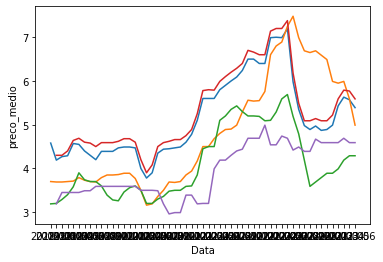

In [191]:
sns.lineplot(data=dfgasolina, x=dfgasolina['Data'], y= dfgasolina['preco_medio'])
sns.lineplot(data=dfdiesel, x=dfdiesel['Data'], y= dfdiesel['preco_medio'])
sns.lineplot(data=dfetanol, x=dfetanol['Data'], y= dfetanol['preco_medio'])
sns.lineplot(data=dfgasadt, x=dfgasadt['Data'], y= dfgasadt['preco_medio'])
sns.lineplot(data=dfgnv, x=dfgnv['Data'], y= dfgnv['preco_medio'])

Como podemos ver no gráfico ficou muita informação, vamos dar uma separada melhor

Primeiro vamos nos perguntar: Quanto foi o máximo da média para cada? e o mínimo?

In [192]:
print('Gasolina: \n', dfgasolina.query('preco_medio == preco_medio.max()'))
print('Diesel: \n', dfdiesel.query('preco_medio == preco_medio.max()'))
print('Etanol: \n', dfetanol.query('preco_medio == preco_medio.max()'))
print('Gasolina Aditivada: \n', dfgasadt.query('preco_medio == preco_medio.max()'))
print('Gas Natural: \n', dfgnv.query('preco_medio == preco_medio.max()'))

Gasolina: 
     preco_medio     Data
42         7.19  2022-06
Diesel: 
     preco_medio     Data
43         7.48  2022-07
Etanol: 
     preco_medio     Data
42         5.69  2022-06
Gasolina Aditivada: 
     preco_medio     Data
41         7.38  2022-06
Gas Natural: 
     preco_medio     Data
37         4.99  2022-02


In [193]:
print('Gasolina: \n', dfgasolina.query('preco_medio == preco_medio.min()'))
print('Diesel: \n', dfdiesel.query('preco_medio == preco_medio.min()'))
print('Etanol: \n', dfetanol.query('preco_medio == preco_medio.min()'))
print('Gasolina Aditivada: \n', dfgasadt.query('preco_medio == preco_medio.min()'))
print('Gas Natural: \n', dfgnv.query('preco_medio == preco_medio.min()'))

Gasolina: 
     preco_medio     Data
17         3.78  2020-05
Diesel: 
     preco_medio     Data
17         3.16  2020-05
Etanol: 
    preco_medio     Data
0         3.19  2018-12
Gasolina Aditivada: 
     preco_medio     Data
16          3.9  2020-05
Gas Natural: 
     preco_medio     Data
20         2.96  2020-09


In [194]:
dfgasolina['Data'] = dfgasolina['Data'].astype('datetime64[ns]')
dfdiesel['Data'] = dfgasolina['Data'].astype('datetime64[ns]')
dfetanol['Data'] = dfgasolina['Data'].astype('datetime64[ns]')
dfgasadt['Data'] = dfgasolina['Data'].astype('datetime64[ns]')
dfgnv['Data'] = dfgasolina['Data'].astype('datetime64[ns]')


In [195]:
dfgasolina['Ano'] = dfgasolina['Data'].dt.year
dfgasolina['Quarto de Ano'] = dfgasolina['Data'].dt.quarter
soma_quartil = dfgasolina.groupby(['Ano', 'Quarto de Ano'])['preco_medio'].mean()
df_soma_quartil_gasolina = soma_quartil.reset_index()
df_soma_quartil_gasolina.head()


,Ano,Quarto de Ano,preco_medio
0,2018,4,4.580000
1,2019,1,4.250000
2,2019,2,4.506667
3,2019,3,4.296667
4,2019,4,4.416667


In [196]:
dfdiesel['Ano'] = dfdiesel['Data'].dt.year
dfdiesel['Quarto de Ano'] = dfdiesel['Data'].dt.quarter
soma_quartil = dfdiesel.groupby(['Ano', 'Quarto de Ano'])['preco_medio'].mean()
df_soma_quartil_diesel = soma_quartil.reset_index()
df_soma_quartil_diesel.head()

,Ano,Quarto de Ano,preco_medio
0,2018,4,3.700000
1,2019,1,3.693333
2,2019,2,3.743333
3,2019,3,3.726667
4,2019,4,3.853333


In [199]:
dfetanol['Ano'] = dfetanol['Data'].dt.year
dfetanol['Quarto de Ano'] = dfetanol['Data'].dt.quarter
soma_quartil = dfetanol.groupby(['Ano', 'Quarto de Ano'])['preco_medio'].mean()
df_soma_quartil_etanol = soma_quartil.reset_index()
df_soma_quartil_etanol.head()

,Ano,Quarto de Ano,preco_medio
0,2018,4,3.190000
1,2019,1,3.296667
2,2019,2,3.740000
3,2019,3,3.666667
4,2019,4,3.310000


In [200]:
dfgasadt['Ano'] = dfgasadt['Data'].dt.year
dfgasadt['Quarto de Ano'] = dfgasadt['Data'].dt.quarter
soma_quartil = dfgasadt.groupby(['Ano', 'Quarto de Ano'])['preco_medio'].mean()
df_soma_quartil_gasadt = soma_quartil.reset_index()
df_soma_quartil_gasadt.head()

,Ano,Quarto de Ano,preco_medio
0,2018,4,4.300000
1,2019,1,4.446667
2,2019,2,4.623333
3,2019,3,4.560000
4,2019,4,4.630000


In [201]:
dfgnv['Ano'] = dfgnv['Data'].dt.year
dfgnv['Quarto de Ano'] = dfgnv['Data'].dt.quarter
soma_quartil = dfgnv.groupby(['Ano', 'Quarto de Ano'])['preco_medio'].mean()
df_soma_quartil_gnv = soma_quartil.reset_index()
df_soma_quartil_gnv.head()

,Ano,Quarto de Ano,preco_medio
0,2018,4,3.190000
1,2019,1,3.450000
2,2019,2,3.476667
3,2019,3,3.590000
4,2019,4,3.590000


Vamos visualizar para ver se melhorou

[Text(0.5, 1.0, 'Preço da Gasolina em média')]

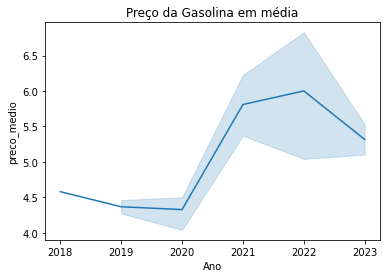

In [197]:
sns.lineplot(df_soma_quartil_gasolina, x=df_soma_quartil_gasolina['Ano'], y=df_soma_quartil_gasolina['preco_medio'], legend="brief").set(title='Preço da Gasolina em média')

Só lembrando como estava o antigo

<AxesSubplot: xlabel='Data', ylabel='preco_medio'>

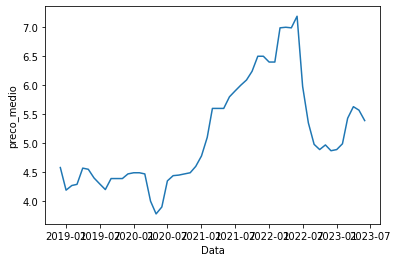

In [198]:
sns.lineplot(dfgasolina, x=dfgasolina['Data'], y = dfgasolina['preco_medio'])

agora vamos visualizar os proximos:

[Text(0.5, 1.0, 'Preço do Diesel em média')]

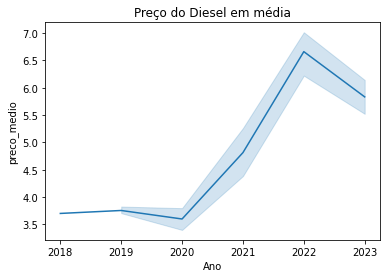

In [203]:
sns.lineplot(df_soma_quartil_diesel, x=df_soma_quartil_diesel['Ano'], y=df_soma_quartil_diesel['preco_medio'], legend="brief").set(title='Preço do Diesel em média')

<AxesSubplot: xlabel='Data', ylabel='preco_medio'>

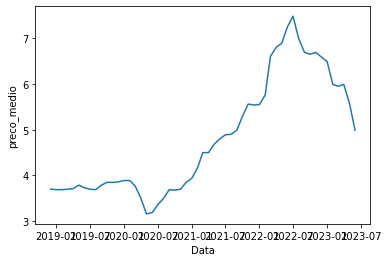

In [204]:
sns.lineplot(dfdiesel, x=dfdiesel['Data'], y = dfdiesel['preco_medio'])

[Text(0.5, 1.0, 'Preço do Etanol em média')]

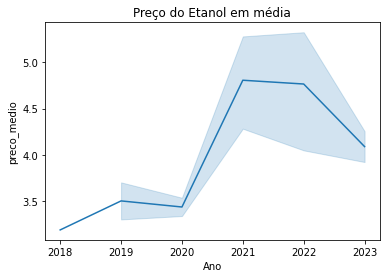

In [205]:
sns.lineplot(df_soma_quartil_etanol, x=df_soma_quartil_etanol['Ano'], y=df_soma_quartil_etanol['preco_medio'], legend="brief").set(title='Preço do Etanol em média')

<AxesSubplot: xlabel='Data', ylabel='preco_medio'>

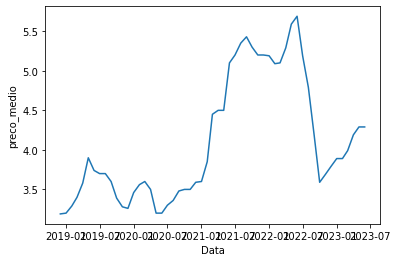

In [206]:
sns.lineplot(dfetanol, x=dfetanol['Data'], y = dfetanol['preco_medio'])

[Text(0.5, 1.0, 'Preço do Gasolina Aditivada em média')]

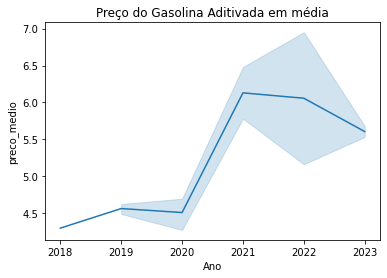

In [207]:
sns.lineplot(df_soma_quartil_gasadt, x=df_soma_quartil_gasadt['Ano'], y=df_soma_quartil_gasadt['preco_medio'], legend="brief").set(title='Preço do Gasolina Aditivada em média')

<AxesSubplot: xlabel='Data', ylabel='preco_medio'>

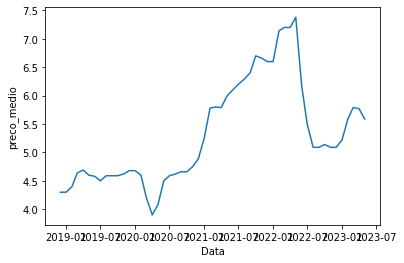

In [208]:
sns.lineplot(dfgasadt, x=dfgasadt['Data'], y = dfgasadt['preco_medio'])

[Text(0.5, 1.0, 'Preço do Gás Natural em média')]

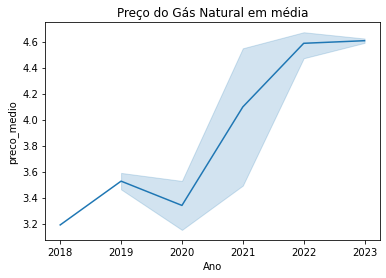

In [209]:
sns.lineplot(df_soma_quartil_gnv, x=df_soma_quartil_gnv['Ano'], y=df_soma_quartil_gnv['preco_medio'], legend="brief").set(title='Preço do Gás Natural em média')

<AxesSubplot: xlabel='Data', ylabel='preco_medio'>

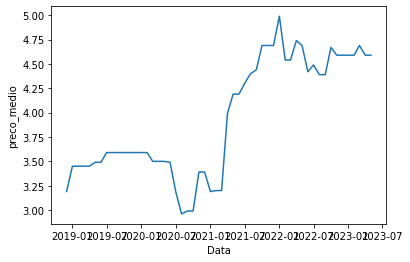

In [210]:
sns.lineplot(dfgnv, x=dfgnv['Data'], y = dfgnv['preco_medio'])

In [218]:
combustiveismax = [dfgasolina['preco_medio'].max(), dfdiesel['preco_medio'].max(), dfetanol['preco_medio'].max(), dfgasadt['preco_medio'].max(), dfgnv['preco_medio'].max()]
combustiveismin = [dfgasolina['preco_medio'].min(), dfdiesel['preco_medio'].min(), dfetanol['preco_medio'].min(), dfgasadt['preco_medio'].min(), dfgnv['preco_medio'].min()]

dados = {'Combustível': ['Gasolina', 'Diesel', 'Etanol', 'Gasolina Aditivada', 'GNV'],
        'Preço Máximo': combustiveismax,
        'Preço Mínimo': combustiveismin}

df_combustiveis = pd.DataFrame(dados)


In [219]:
df_combustiveis

,Combustível,Preço Máximo,Preço Mínimo
0,Gasolina,7.19,3.78
1,Diesel,7.48,3.16
2,Etanol,5.69,3.19
3,Gasolina Aditivada,7.38,3.90
4,GNV,4.99,2.96


[Text(0.5, 1.0, 'Maximo de preços por Combustível')]

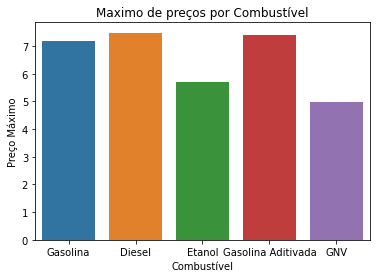

In [224]:
sns.barplot(df_combustiveis,x=df_combustiveis['Combustível'], y=df_combustiveis['Preço Máximo']).set(title='Maximo de preços por Combustível')

[Text(0.5, 1.0, 'Mínimo de preços por Combustível')]

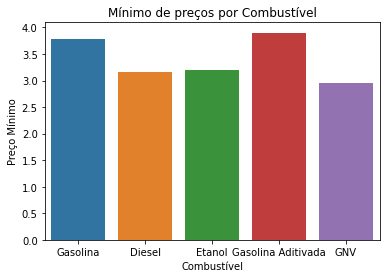

In [225]:
sns.barplot(df_combustiveis,x=df_combustiveis['Combustível'], y=df_combustiveis['Preço Mínimo']).set(title='Mínimo de preços por Combustível')